<a href="https://colab.research.google.com/github/EWECORP/DScience_41870/blob/main/Data_StoryTelling_Eduardo_Ettlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

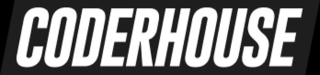

# **CURSO DE DATA SCIENCE**
##**DATA STORY TELLING**
## **DESAFIO N° 10 - DATA STORY TELLING**

*AUTOR:Eduardo ETTLIN

Accidentes en EE. UU. (2016 - 2021)
Un conjunto de datos de accidentes de tráfico en todo el país (2016 - 2021)


**Acerca del conjunto de datos**

*Descripción*

Este es un conjunto de datos de accidentes automovilísticos de todo el país, que cubre 49 estados de los EE. UU. Los datos de accidentes se recopilan desde febrero de 2016 hasta diciembre de 2021, utilizando múltiples API que proporcionan transmisión de datos de incidentes (o eventos) de tráfico. Estas API transmiten datos de tráfico capturados por una variedad de entidades, como los departamentos de transporte estatales y de EE. UU., agencias de aplicación de la ley, cámaras de tráfico y sensores de tráfico dentro de las redes de carreteras. Actualmente, hay alrededor de 2,8 millones de registros de accidentes en este conjunto de datos.
"Se entrega el siguiente set de datos con nombre “US_Accidents_Dec21_updated.csv”.

**Contenido**

Este conjunto de datos se ha recopilado en tiempo real mediante varias API de tráfico. Actualmente, contiene datos de accidentes recopilados desde febrero de 2016 hasta diciembre de 2021 para los Estados Unidos contiguos.

**Inspiración**

US-Accidentes” se puede utilizar para numerosas aplicaciones, como la predicción de accidentes automovilísticos en tiempo real, el estudio de ubicaciones de puntos críticos de accidentes automovilísticos, el análisis de víctimas y la extracción de reglas de causa y efecto para predecir accidentes automovilísticos, y el estudio del impacto de la precipitación u otros estímulos ambientales en la ocurrencia de accidentes. La publicación más reciente del conjunto de datos también puede ser útil para estudiar el impacto de COVID-19 en el comportamiento del tráfico y los accidentes.

**Cobertura**

El conjunto de datos cubre 49 estados de los EE. UU. El siguiente diagrama muestra la distribución actual de datos en todos los estados.

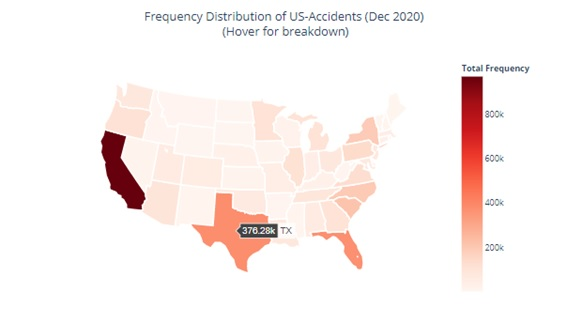

#**Introducción**

**Contexto empresarial.**

Estados Unidos ha experimentado un aumento en el número de accidentes en las carreteras. Quieren saber si el número de accidentes ha aumentado en las últimos meses. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante los últimos 5 años(desde 2016 hasta 2021).

El cliente nos ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como geologalización, hora del día, condiciones climáticas, gravedad del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.**

Nuestra tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.**

 Se le proporciona un archivo CSV (almacenado en la carpeta datos ya creada) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, gravedad del accidente,etc. El delimitador en el archivo CSV dado es el signo (;) en lugar del predeterminado (,). Realizará las siguientes tareas con los datos:

Extraiga datos adicionales compementarios

Leer, transformar y preparar datos para su visualización

Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.

El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1- ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?.

2- Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?.

3- ¿Hay más accidentes entre semana que durante los fines de semana?.

4- ¿Cuál es la proporción de recuento de accidentes por estado o cuidad?

5- ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?

6- Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q #quiet mode

     | 22.6 MB 22.1 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 46.0 MB/s eta 0:00:00


In [2]:
#Conectamos mi drive
from google.colab import drive
#Importamos OS
import os
#Montamos drive
drive.mount('/content/gdrive', force_remount=True)
# Establecer ruta de acceso en drive
import os
print(os.getcwd())


Mounted at /content/gdrive
/content


In [2]:
#Importamos las librerias

# Operaciones Basicas
import numpy as np
import pandas as pd
import pandas_profiling

# Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-2-77c9262dd059>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [4]:
# Me muevo a la carpeta
os.chdir("/content/gdrive/MyDrive/DScience_41870")
print(os.getcwd())

#Lectura del dataframe
datos=pd.read_csv('/content/gdrive/MyDrive/DScience_41870/US_Accidents_Dec21_updated.csv',sep=',')
datos.head()


/content/gdrive/MyDrive/DScience_41870


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
#Veamos el shape
datos.shape

(2845342, 47)

In [6]:
#Totalidad de registros por columnas
datos.count()

ID                       2845342
Severity                 2845342
Start_Time               2845342
End_Time                 2845342
Start_Lat                2845342
Start_Lng                2845342
End_Lat                  2845342
End_Lng                  2845342
Distance(mi)             2845342
Description              2845342
Number                   1101431
Street                   2845340
Side                     2845342
City                     2845205
County                   2845342
State                    2845342
Zipcode                  2844023
Country                  2845342
Timezone                 2841683
Airport_Code             2835793
Weather_Timestamp        2794606
Temperature(F)           2776068
Wind_Chill(F)            2375699
Humidity(%)              2772250
Pressure(in)             2786142
Visibility(mi)           2774796
Wind_Direction           2771567
Wind_Speed(mph)          2687398
Precipitation(in)        2295884
Weather_Condition        2774706
Amenity   

In [7]:
#Tipo de dato de cada columna
datos.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [8]:
#Tipo de estructura del dataset
type(datos)

pandas.core.frame.DataFrame

In [9]:
#Principales medidas estadisticas
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,2845342.0,2.137572,0.478722,1.000000,2.000000,2.000000,2.000000,4.000000e+00
Start_Lat,2845342.0,36.245201,5.363797,24.566027,33.445174,36.098609,40.160243,4.900058e+01
Start_Lng,2845342.0,-97.114633,18.317819,-124.548074,-118.033113,-92.418076,-80.372431,-6.711317e+01
End_Lat,2845342.0,36.245321,5.363873,24.566013,33.446278,36.097987,40.161049,4.907500e+01
End_Lng,2845342.0,-97.114387,18.317632,-124.545748,-118.033331,-92.417718,-80.373383,-6.710924e+01
Distance(mi),2845342.0,0.702678,1.560361,0.000000,0.052000,0.244000,0.764000,1.551860e+02
Number,1101431.0,8089.408114,18360.093995,0.000000,1270.000000,4007.000000,9567.000000,9.999997e+06
Temperature(F),2776068.0,61.793556,18.622629,-89.000000,50.000000,64.000000,76.000000,1.960000e+02
Wind_Chill(F),2375699.0,59.658231,21.160967,-89.000000,46.000000,63.000000,76.000000,1.960000e+02
Humidity(%),2772250.0,64.365452,22.874568,1.000000,48.000000,67.000000,83.000000,1.000000e+02


In [ ]:
#Data Profiling
profile = pandas_profiling.ProfileReport(datos)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [3]:
#Hagamos un HeatMap del df

plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(datos.corr(), annot = True, cmap = 'Wistia')
plt.title('Mapa de calor para el Dataset', fontsize = 20)
plt.show()

NameError: ignored

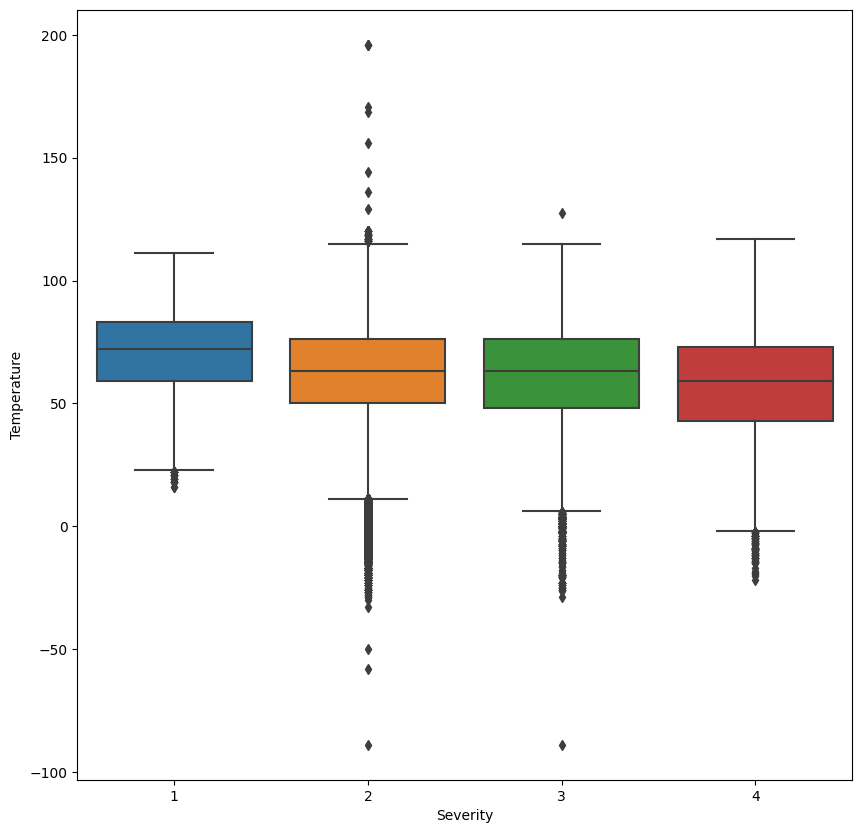

In [ ]:
#Boxplot
plt.figure(figsize=(10,10)) #defino el tamaño del grafico
sns.boxplot(y = 'Temperature', x = 'Severity', data = datos)
plt.show()

In [ ]:
#Ejemplo: Categórica vs. categórica
pd.crosstab(datos.Severity, datos.Temperature)

Temperature,-89.0,-58.0,-50.0,-33.0,-30.0,-29.0,-28.0,-27.9,-27.4,-27.0,...,119.0,120.0,127.4,129.2,136.0,144.0,156.0,168.8,170.6,196.0
Severity,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,3,2,2,1,6,...,5,8,0,1,1,1,1,1,1,3
3,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.crosstab(datos.Severity, datos.Temperature, normalize=True) #Agregamos los valores en relativo

Temperature,-89.0,-58.0,-50.0,-33.0,-30.0,-29.0,-28.0,-27.9,-27.4,-27.0,...,119.0,120.0,127.4,129.2,136.0,144.0,156.0,168.8,170.6,196.0
Severity,,,,,,,,,,,,,,,,,,,,,
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2,3.894735e-07,3.894735e-07,3.894735e-07,3.894735e-07,3.894735e-07,1.168420e-06,7.789469e-07,7.789469e-07,3.894735e-07,0.000002,...,0.000002,0.000003,0.000000e+00,3.894735e-07,3.894735e-07,3.894735e-07,3.894735e-07,3.894735e-07,3.894735e-07,0.000001
3,3.894735e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.894735e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,3.894735e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


In [ ]:
datos.groupby('Severity')['Temperature'].mean()

Severity
1    71.257955
2    61.694459
3    61.248694
4    57.313515
Name: Temperature, dtype: float64

<Axes: xlabel='Severity', ylabel='Temperature'>

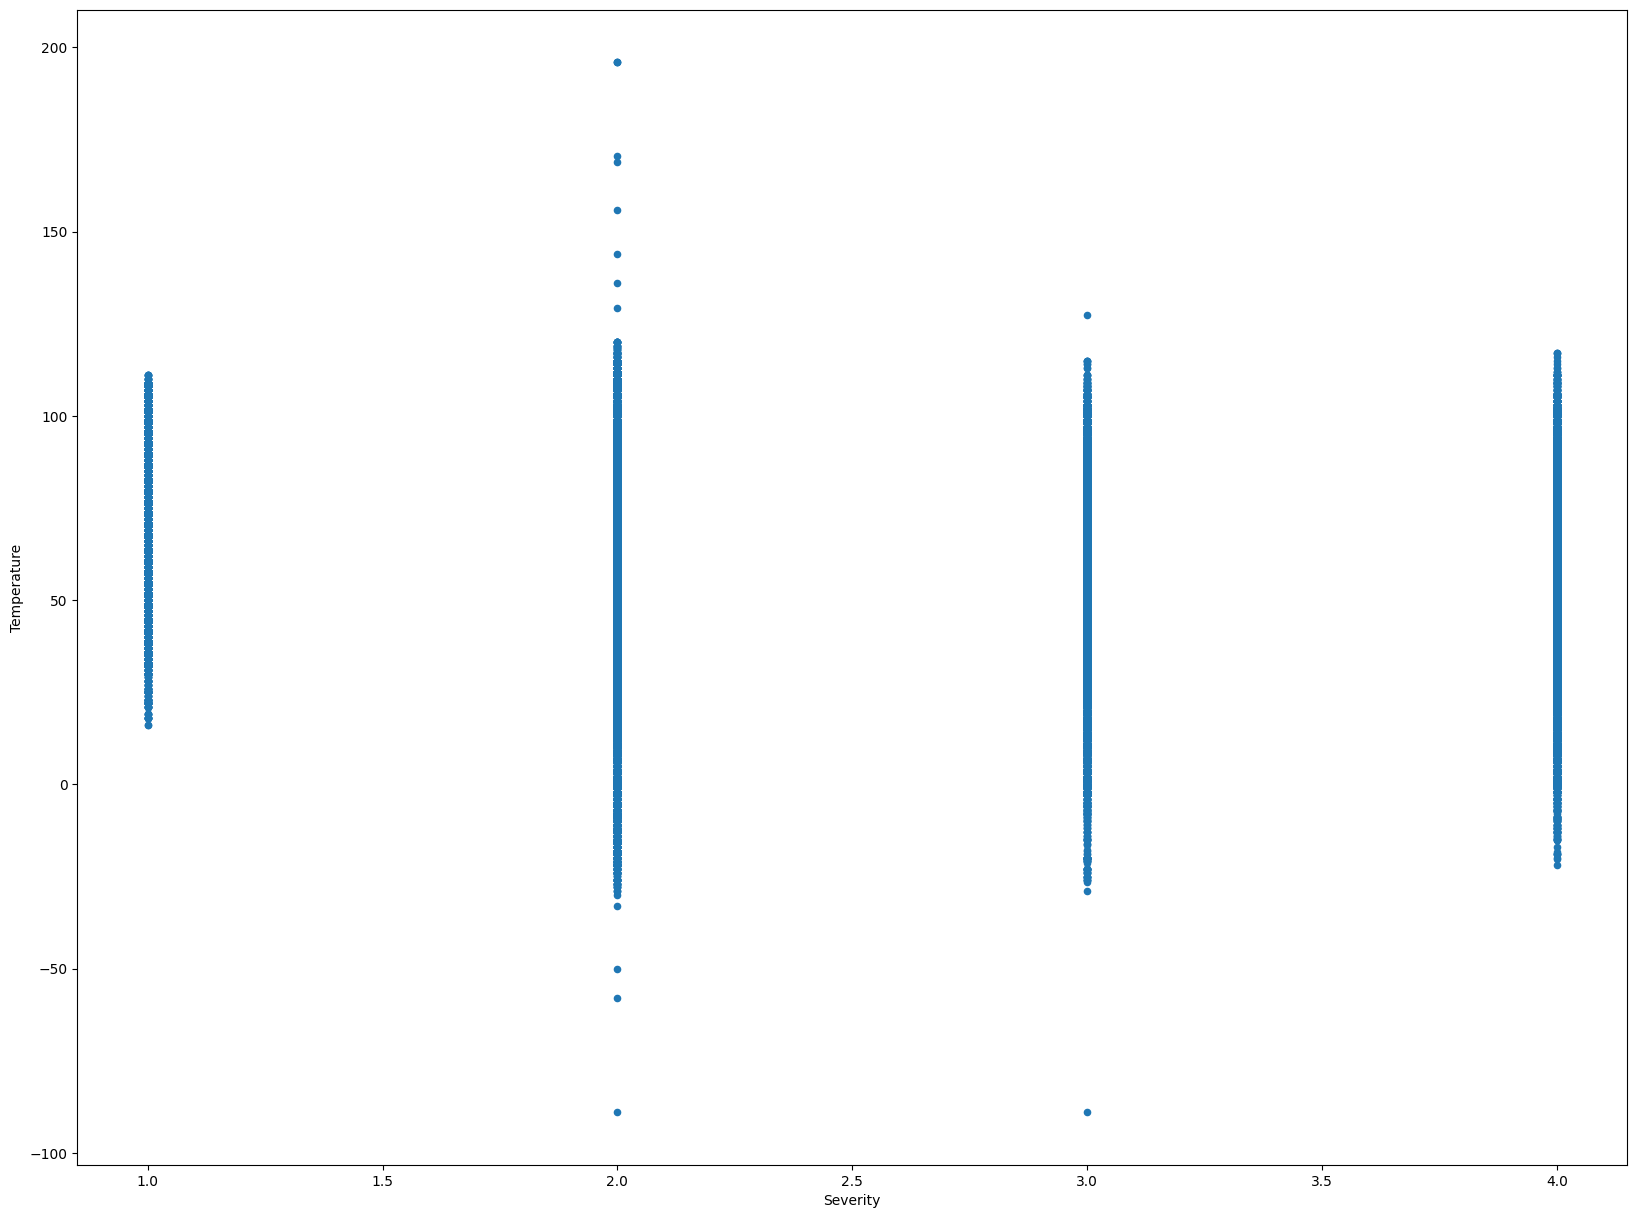

In [ ]:
#Scatterplot
datos.plot.scatter(x='Severity', y='Temperature')

<Axes: xlabel='Severity', ylabel='Temperature'>

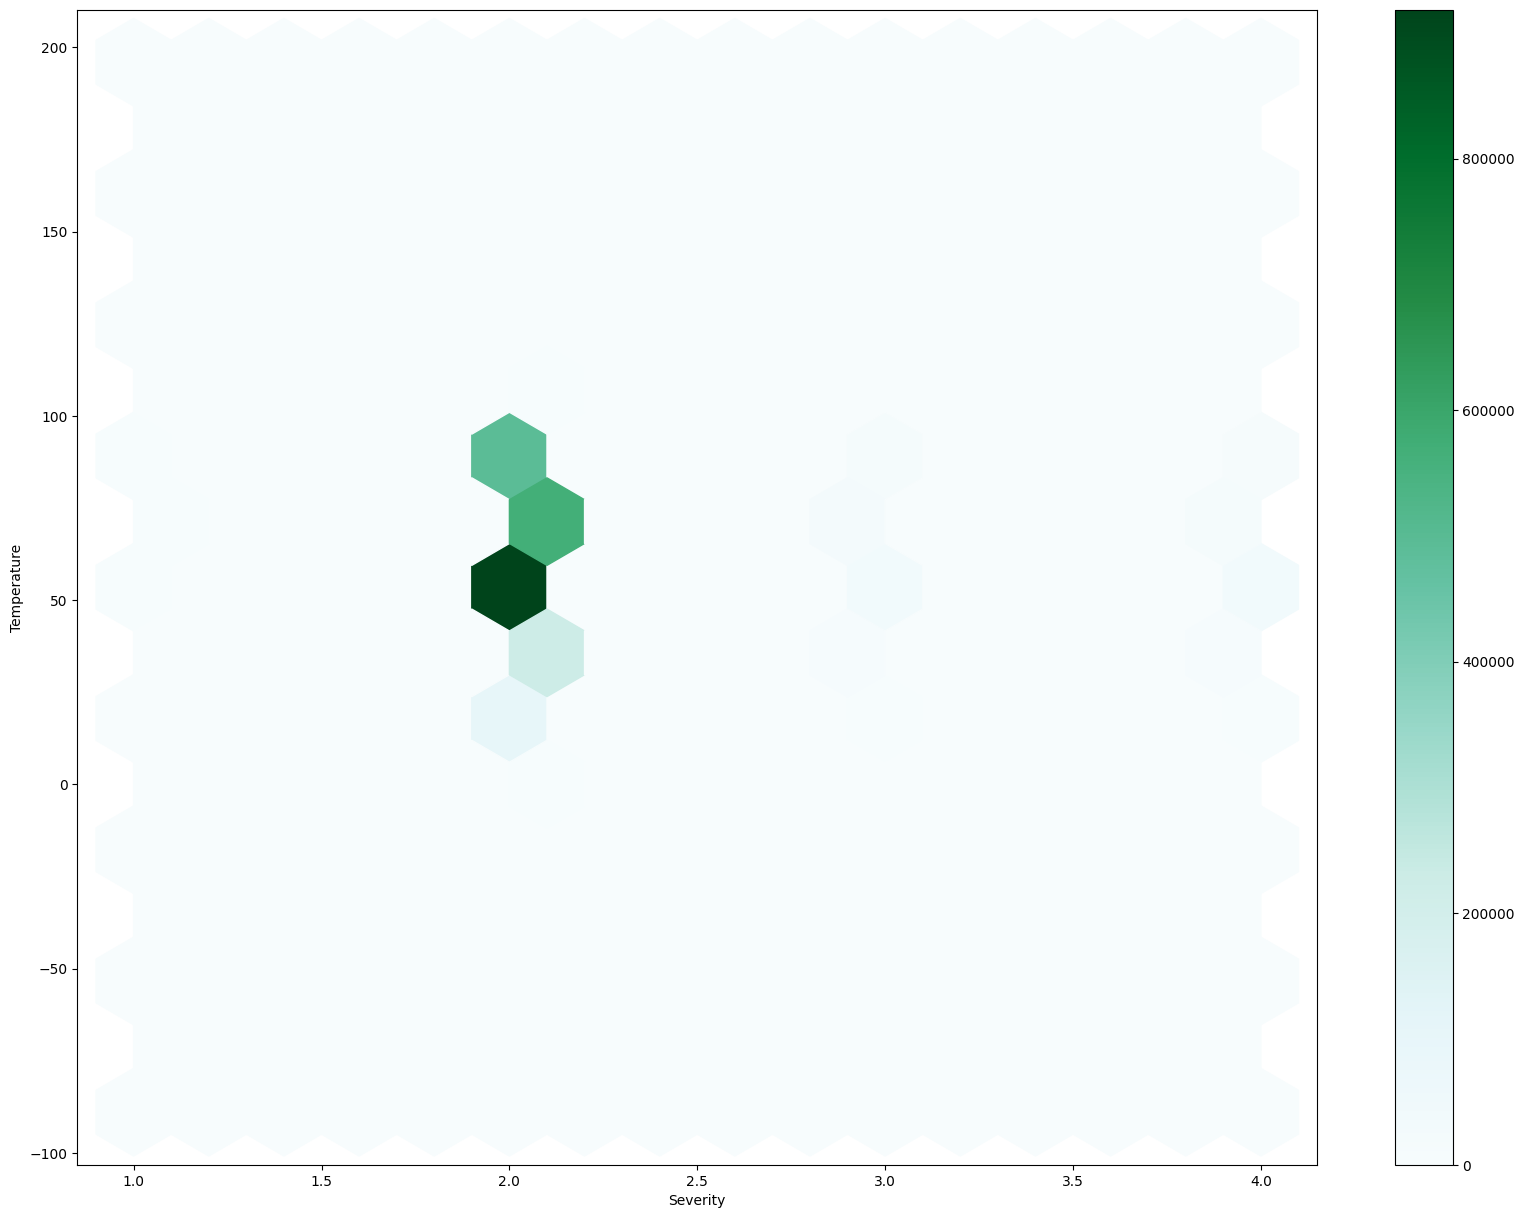

In [ ]:
datos.plot.hexbin(x='Severity', y='Temperature', gridsize=15)

Como conclusión rápida podemos observar que a medida que sube la temperatura(F) aumentan los accidentes con la gravedad del tipo 2.